In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
titanic_data = pd.read_csv("train.csv")

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_data.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [7]:
sns.heatmap(titanic_data.corr(), cmap = "YlGnBU")
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set =titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]



In [11]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S


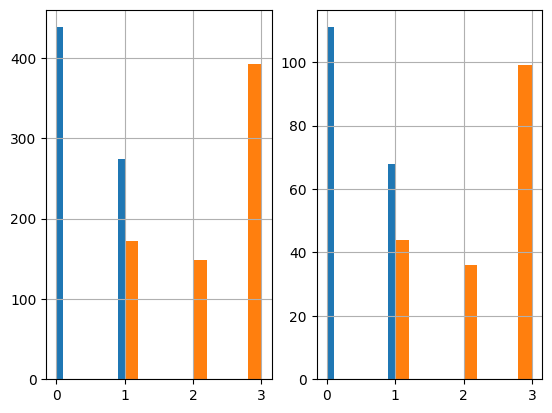

In [19]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()


plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
plt.show()


In [20]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 93 to 188
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          570 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    

    def transform(self, X):
        imputer = SimpleImputer(strategy= "mean")
        X["Age"]= imputer.fit_transform(X[["Age"]])
        return X

In [28]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit (self,X , y=None):
        return self
    def transform(self, X):
        encoder= OneHotEncoder()
        matrix =encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_names = ["C","S","Q","N"]
        
        for i in range (len(matrix.T)):
            X[column_names[i]]= matrix.T[i]
            
        matrix =encoder.fit_transform(X[["Sex"]]).toarray()
            
        column_names=["Female","Male"]    
        
        for i in range (len(matrix.T)):
        
            X[column_names[i]]= matrix.T[i]
        return X    

In [38]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin","Sex","N"], axis =1, errors = "ignore")

In [39]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper",FeatureDropper())
                     ])

In [40]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [41]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
93,94,0,3,26.0,1,2,20.5750,0.0,0.0,1.0,0.0,1.0
528,529,0,3,39.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
820,821,1,1,52.0,1,1,93.5000,0.0,0.0,1.0,1.0,0.0
104,105,0,3,37.0,2,0,7.9250,0.0,0.0,1.0,0.0,1.0
712,713,1,1,48.0,1,0,52.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,363,0,3,45.0,0,1,14.4542,1.0,0.0,0.0,1.0,0.0
92,93,0,1,46.0,1,0,61.1750,0.0,0.0,1.0,0.0,1.0
275,276,1,1,63.0,1,0,77.9583,0.0,0.0,1.0,1.0,0.0
443,444,1,2,28.0,0,0,13.0000,0.0,0.0,1.0,1.0,0.0


In [42]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 93 to 188
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [46]:
from sklearn.preprocessing import StandardScaler

X= strat_train_set.drop("Survived", axis=1)
Y=strat_train_set["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [47]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10,100,200,500], "max_depth":[None, 5,10],
     "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, Y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [49]:
final_clf = grid_search.best_estimator_

In [50]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3)

In [51]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [52]:
X_test = strat_test_set.drop("Survived", axis =1)
Y_test = strat_test_set["Survived"]
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()

In [53]:
final_clf.score(X_data_test, Y_data_test)

0.8212290502793296

In [54]:
final_data = pipeline.fit_transform(titanic_data)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [55]:
X_final = final_data.drop("Survived", axis =1)
Y_final = final_data["Survived"]
scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()

In [56]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10,100,200,500,1000], "max_depth":[None, 5,10,15,20],
     "min_samples_split": [2,3,4,5,6]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv = 3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 15, 20],
                          'min_samples_split': [2, 3, 4, 5, 6],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [58]:
prod_clf = grid_search.best_estimator_
prod_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [59]:
titanic_test_data = pd.read_csv("test.csv")

In [60]:
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [61]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method= "ffill")
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [64]:
predictions = prod_clf.predict(X_data_final_test)

In [65]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"]=predictions
final_df.to_csv("predictions.csv", index = False)

In [66]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
